# Propagación de la afinidad

In [2]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [49]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle

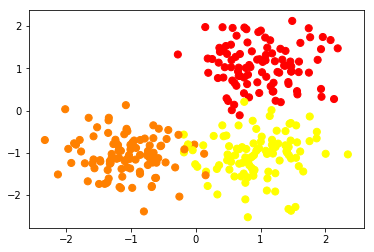

In [10]:
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="autumn")

In [12]:
af = AffinityPropagation(preference = -50).fit(X)

In [16]:
cluster_center_ids = af.cluster_centers_indices_

In [18]:
labels = af.labels_

In [21]:
n_clust = len(cluster_center_ids)
n_clust

3

In [50]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference = -50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    clust_labels = af.labels_
    n_clust = len(cluster_center_ids)

    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf() #Establecer el tipo de dibujo
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk") #Ciclo de colores
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col + '.')
        plt.plot(clust_center[0], clust_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1],x[1]], col)
    
    plt.title("Número estimado de clusters: %d"%n_clust)
    plt.show()                                        

Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Información mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


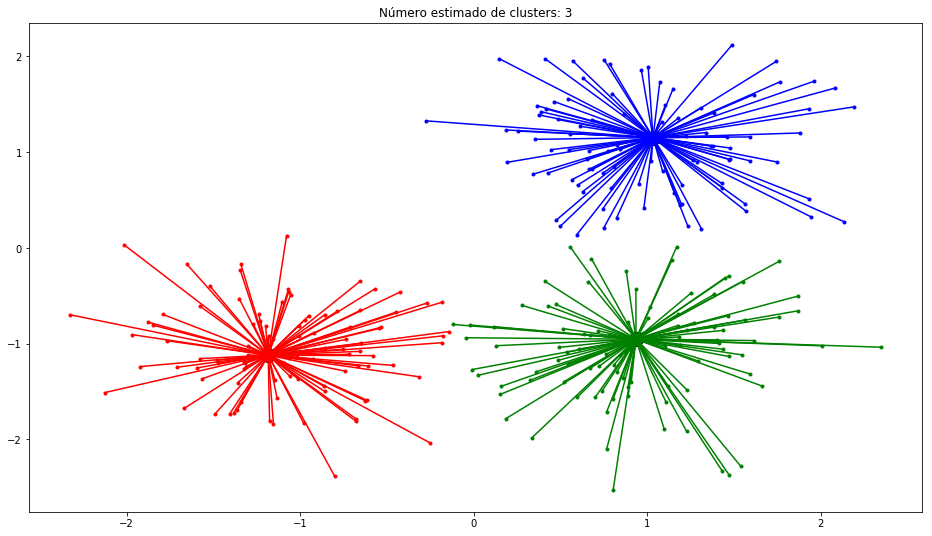

In [51]:
report_affinity_propagation(X)